In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.15.0


In [11]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [12]:
def build_and_compile_model_input(k):
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(512, activation='relu', input_shape=(k,)),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0005),
                    loss="mse",
                    metrics=['mae'])
      return model

EPOCHS = 30

DATASET=pd.read_csv('../dane_scalone.csv')


MODEL A - DANE BEZ PORY ROKU

In [13]:
dataset = DATASET
dataset

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw
0,2.0,1.0,0.000000,0.0
1,2.0,1.0,0.000694,0.0
2,2.0,1.0,0.001389,0.0
3,2.0,1.0,0.002083,0.0
4,2.0,1.0,0.002778,0.0
...,...,...,...,...
12418555,1.0,7.0,0.996528,0.0
12418556,1.0,7.0,0.997222,0.0
12418557,1.0,7.0,0.997917,0.0
12418558,1.0,7.0,0.998611,0.0


In [14]:
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model =build_and_compile_model_input(2)

In [15]:
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

Epoch 1/50
77616/77616 [==============================] - 158s 2ms/step - loss: 0.6943 - mae: 0.1632
Epoch 2/50
77616/77616 [==============================] - 158s 2ms/step - loss: 0.6900 - mae: 0.1625
Epoch 3/50
77616/77616 [==============================] - 156s 2ms/step - loss: 0.6895 - mae: 0.1618
Epoch 4/50
56972/77616 [=====================>........] - ETA: 42s - loss: 0.6886 - mae: 0.1614

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test, y_test, batch_size=128)

252/252 [==============================] - 0s 1ms/step - loss: 0.7204 - mae: 0.1710


[0.7204099893569946, 0.1709700971841812]

113/113 [==============================] - 0s 764us/step


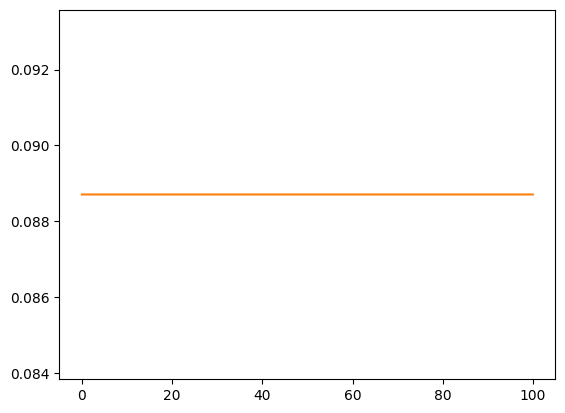

In [ ]:
flow_time=np.arange(0,100,100/3600) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)

plt.plot(flow_time, flow_result)

MODEL B - TYLKO JEDEN DZIEŃ TYGODANIA


In [ ]:


def prep_data(data,day):
      data=data.drop(columns="Pora_roku")
      data = data[data['Dzien_tygodnia'] == day]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      x=x.drop(columns="Dzien_tygodnia")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      return [x,y]

PONIEDZIAŁEK

Epoch 1/10
144/144 [==============================] - 1s 2ms/step - loss: 2.4676 - mae: 0.3294
Epoch 2/10
144/144 [==============================] - 0s 2ms/step - loss: 0.8133 - mae: 0.1865
Epoch 3/10
144/144 [==============================] - 0s 2ms/step - loss: 0.8131 - mae: 0.1806
Epoch 4/10
144/144 [==============================] - 0s 2ms/step - loss: 0.8102 - mae: 0.1821
Epoch 5/10
144/144 [==============================] - 0s 2ms/step - loss: 0.8103 - mae: 0.1832
Epoch 6/10
144/144 [==============================] - 0s 2ms/step - loss: 0.8102 - mae: 0.1799
Epoch 7/10
144/144 [==============================] - 0s 2ms/step - loss: 0.8108 - mae: 0.1869
Epoch 8/10
144/144 [==============================] - 0s 2ms/step - loss: 0.8105 - mae: 0.1838
Epoch 9/10
144/144 [==============================] - 0s 2ms/step - loss: 0.8103 - mae: 0.1829
Epoch 10/10
113/113 [==============================] - 0s 713us/step


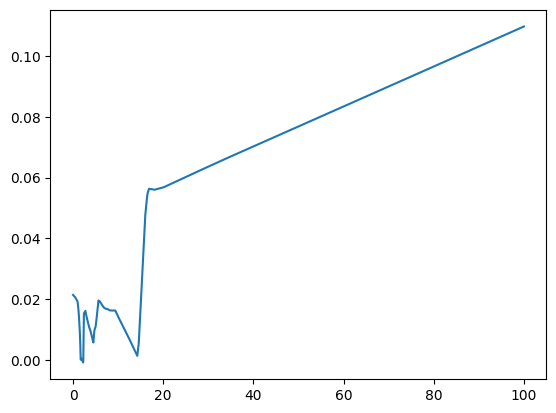

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_pon=np.arange(0,100,100/3600) 
flow_result_pon = model.predict(flow_time_pon).T

plt.plot(flow_time_pon, flow_result_pon.reshape(3600))

WTOREK

Epoch 1/10
144/144 [==============================] - 1s 2ms/step - loss: 14.3679 - mae: 0.5580
Epoch 2/10
144/144 [==============================] - 0s 3ms/step - loss: 0.6464 - mae: 0.1631
Epoch 3/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6403 - mae: 0.1471
Epoch 4/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6390 - mae: 0.1499
Epoch 5/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6391 - mae: 0.1506
Epoch 6/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6405 - mae: 0.1546
Epoch 7/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6395 - mae: 0.1472
Epoch 8/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6399 - mae: 0.1492
Epoch 9/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6377 - mae: 0.1531
Epoch 10/10
113/113 [==============================] - 0s 804us/step


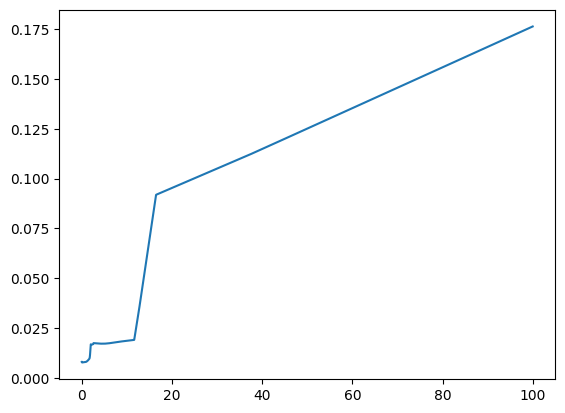

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_wt=np.arange(0,100,100/3600) 
flow_result_wt = model.predict(flow_time_wt)

plt.plot(flow_time_wt, flow_result_wt.reshape(3600))

ŚRODA

Epoch 1/10
144/144 [==============================] - 1s 2ms/step - loss: 3.2267 - mae: 0.3828
Epoch 2/10
144/144 [==============================] - 0s 2ms/step - loss: 0.7539 - mae: 0.1917
Epoch 3/10
144/144 [==============================] - 0s 2ms/step - loss: 0.7425 - mae: 0.1691
Epoch 4/10
144/144 [==============================] - 0s 2ms/step - loss: 0.7439 - mae: 0.1730
Epoch 5/10
144/144 [==============================] - 0s 2ms/step - loss: 0.7408 - mae: 0.1718
Epoch 6/10
144/144 [==============================] - 0s 2ms/step - loss: 0.7404 - mae: 0.1706
Epoch 7/10
144/144 [==============================] - 0s 2ms/step - loss: 0.7413 - mae: 0.1678
Epoch 8/10
144/144 [==============================] - 0s 2ms/step - loss: 0.7406 - mae: 0.1736
Epoch 9/10
144/144 [==============================] - 0s 2ms/step - loss: 0.7411 - mae: 0.1728
Epoch 10/10
113/113 [==============================] - 0s 747us/step


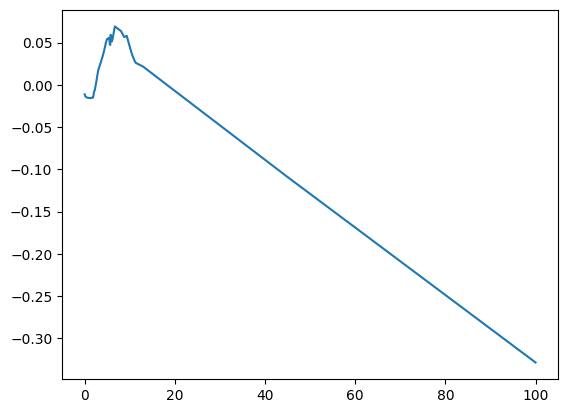

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_sr=np.arange(0,100,100/3600)  
flow_result_sr = model.predict(flow_time_sr)   

plt.plot(flow_time_sr, flow_result_sr.reshape(3600))

CZWARTEK

Epoch 1/10
144/144 [==============================] - 1s 2ms/step - loss: 1.5369 - mae: 0.3285
Epoch 2/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6622 - mae: 0.1609
Epoch 3/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - mae: 0.1530
Epoch 4/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - mae: 0.1476
Epoch 5/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6564 - mae: 0.1544
Epoch 6/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - mae: 0.1514
Epoch 7/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6558 - mae: 0.1500
Epoch 8/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - mae: 0.1502
Epoch 9/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6549 - mae: 0.1548
Epoch 10/10
113/113 [==============================] - 0s 728us/step


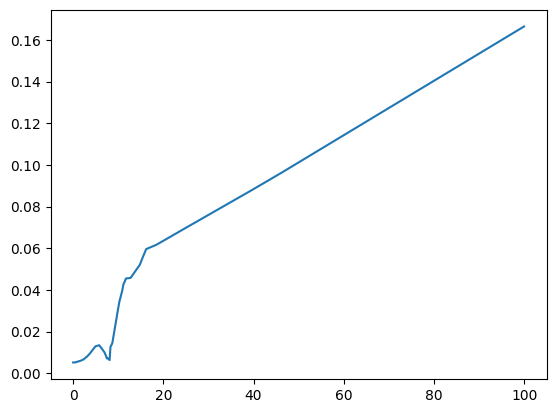

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_czw=np.arange(0,100,100/3600) 
flow_result_czw = model.predict(flow_time_czw)   

plt.plot(flow_time_czw, flow_result_czw.reshape(3600))

PIĄTEK

Epoch 1/10
144/144 [==============================] - 1s 2ms/step - loss: 2.7625 - mae: 0.3077
Epoch 2/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5963 - mae: 0.1562
Epoch 3/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - mae: 0.1503
Epoch 4/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5937 - mae: 0.1500
Epoch 5/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - mae: 0.1552
Epoch 6/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5931 - mae: 0.1511
Epoch 7/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - mae: 0.1522
Epoch 8/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5933 - mae: 0.1496
Epoch 9/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5970 - mae: 0.1574
Epoch 10/10
113/113 [==============================] - 0s 727us/step


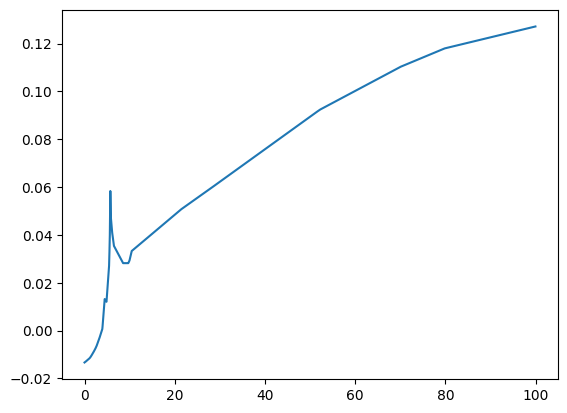

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_pt=np.arange(0,100,100/3600)  
flow_result_pt = model.predict(flow_time_pt)   

plt.plot(flow_time_pt, flow_result_pt.reshape(3600))

SOBOTA

Epoch 1/10
144/144 [==============================] - 1s 2ms/step - loss: 13.3395 - mae: 0.5723
Epoch 2/10
144/144 [==============================] - 0s 2ms/step - loss: 0.6032 - mae: 0.1620
Epoch 3/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5974 - mae: 0.1505
Epoch 4/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5962 - mae: 0.1440
Epoch 5/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5961 - mae: 0.1438
Epoch 6/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - mae: 0.1424
Epoch 7/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5964 - mae: 0.1450
Epoch 8/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - mae: 0.1422
Epoch 9/10
144/144 [==============================] - 0s 2ms/step - loss: 0.5939 - mae: 0.1452
Epoch 10/10
113/113 [==============================] - 0s 700us/step


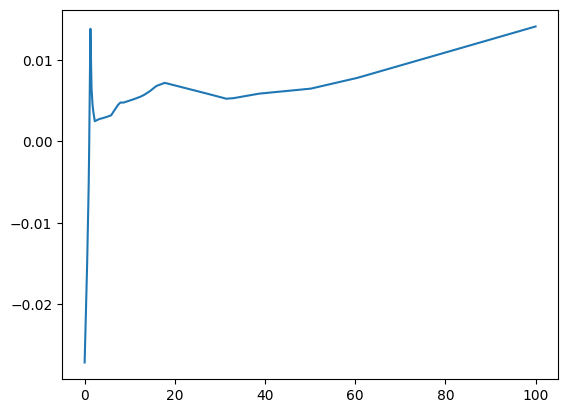

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,6)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_sob=np.arange(0,100,100/3600) 
flow_result_sob = model.predict(flow_time_sob)   

plt.plot(flow_time_sob, flow_result_sob.reshape(3600))

NIEDZIELA

Epoch 1/10
288/288 [==============================] - 1s 2ms/step - loss: 1.8576 - mae: 0.3125
Epoch 2/10
288/288 [==============================] - 0s 2ms/step - loss: 0.8551 - mae: 0.1866
Epoch 3/10
288/288 [==============================] - 0s 2ms/step - loss: 0.8567 - mae: 0.1855
Epoch 4/10
288/288 [==============================] - 0s 2ms/step - loss: 0.8537 - mae: 0.1876
Epoch 5/10
288/288 [==============================] - 0s 2ms/step - loss: 0.8533 - mae: 0.1891
Epoch 6/10
288/288 [==============================] - 0s 2ms/step - loss: 0.8529 - mae: 0.1898
Epoch 7/10
288/288 [==============================] - 0s 2ms/step - loss: 0.8541 - mae: 0.1845
Epoch 8/10
288/288 [==============================] - 0s 2ms/step - loss: 0.8530 - mae: 0.1902
Epoch 9/10
288/288 [==============================] - 0s 1ms/step - loss: 0.8532 - mae: 0.1887
Epoch 10/10
113/113 [==============================] - 0s 743us/step


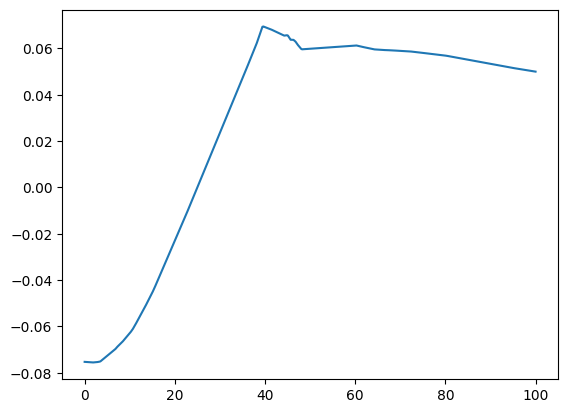

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,7)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=64)

flow_time_dn=np.arange(0,100,100/3600) 
flow_result_dn = model.predict(flow_time_dn)   

plt.plot(flow_time_dn, flow_result_dn.reshape(3600))

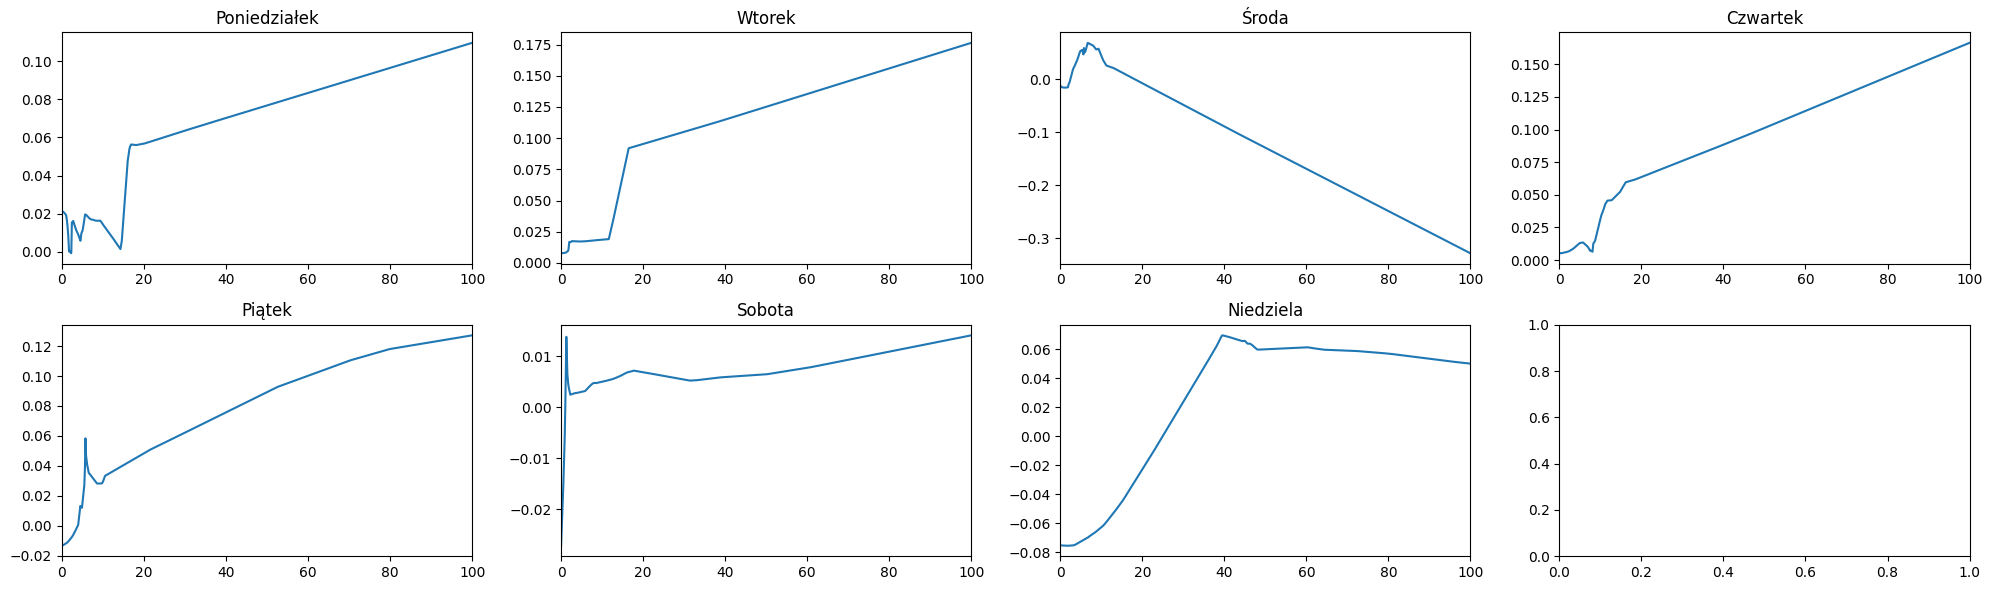

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(3600))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(3600))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(3600))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(3600))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(3600))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(3600))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_dn, flow_result_dn.reshape(3600))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()

MODEL C - DODANIE PORY ROKU

In [ ]:
def prep_data(data,sezon):
      data = data[data['Pora_roku'] == sezon]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      y=y.drop(columns="Pora_roku")
      return [x,y]

WSZYSTKIE PORY ROKU

Epoch 1/10
1008/1008 [==============================] - 3s 2ms/step - loss: 0.9425 - mae: 0.2029
Epoch 2/10
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7010 - mae: 0.1646
Epoch 3/10
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7012 - mae: 0.1629
Epoch 4/10
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7013 - mae: 0.1639
Epoch 5/10
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7013 - mae: 0.1637
Epoch 6/10
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7014 - mae: 0.1634
Epoch 7/10
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7014 - mae: 0.1633
Epoch 8/10
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7013 - mae: 0.1643
Epoch 9/10
1008/1008 [==============================] - 2s 2ms/step - loss: 0.7013 - mae: 0.1636
Epoch 10/10
113/113 [==============================] - 0s 727us/step


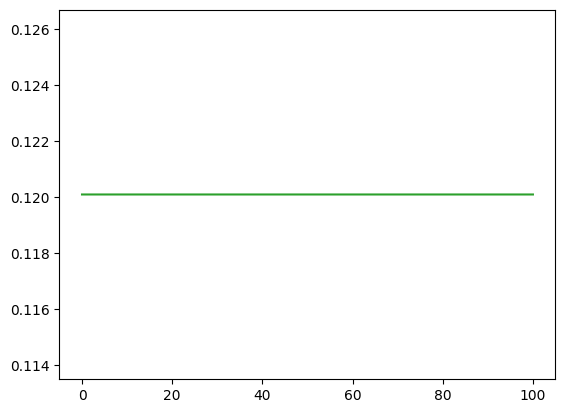

In [ ]:
dataset = DATASET


dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = build_and_compile_model_input(3)


model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time=np.arange(0,100,100/3600) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)   

plt.plot(flow_time, flow_result)

WIOSNA

Epoch 1/10
252/252 [==============================] - 1s 2ms/step - loss: 10490.2656 - mae: 15.4413
Epoch 2/10
252/252 [==============================] - 0s 2ms/step - loss: 22.8212 - mae: 1.5845
Epoch 3/10
252/252 [==============================] - 0s 2ms/step - loss: 0.7695 - mae: 0.2674
Epoch 4/10
252/252 [==============================] - 0s 2ms/step - loss: 1.4076 - mae: 0.4357
Epoch 5/10
252/252 [==============================] - 0s 2ms/step - loss: 0.7557 - mae: 0.2445
Epoch 6/10
252/252 [==============================] - 1s 2ms/step - loss: 0.7610 - mae: 0.2555
Epoch 7/10
252/252 [==============================] - 1s 2ms/step - loss: 0.8194 - mae: 0.2983
Epoch 8/10
252/252 [==============================] - 1s 2ms/step - loss: 0.7731 - mae: 0.2691
Epoch 9/10
252/252 [==============================] - 1s 2ms/step - loss: 0.7629 - mae: 0.2396
Epoch 10/10
113/113 [==============================] - 0s 758us/step


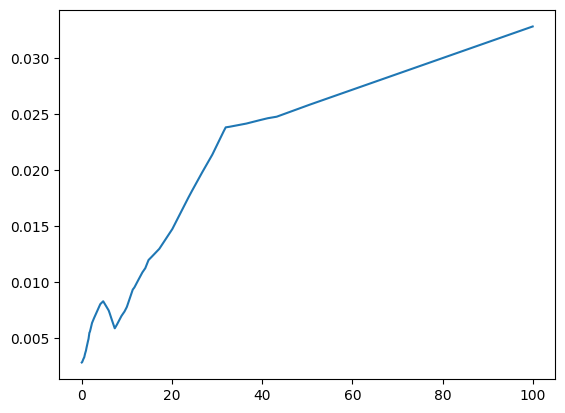

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_spring_plot=np.arange(0,100,100/3600) 
flow_time_spring=np.vstack((1*np.ones_like(flow_time_spring_plot, dtype=int),1*np.ones_like(flow_time_spring_plot, dtype=int),flow_time_spring_plot)).T
flow_result_spring = model.predict(flow_time_spring)   

plt.plot(flow_time_spring_plot, flow_result_spring)

LATO

Epoch 1/10
252/252 [==============================] - 1s 2ms/step - loss: 11882.7109 - mae: 12.6241
Epoch 2/10
252/252 [==============================] - 1s 2ms/step - loss: 5.8001 - mae: 1.1204
Epoch 3/10
252/252 [==============================] - 1s 2ms/step - loss: 1.3216 - mae: 0.3869
Epoch 4/10
252/252 [==============================] - 1s 2ms/step - loss: 0.5197 - mae: 0.1813
Epoch 5/10
252/252 [==============================] - 1s 2ms/step - loss: 0.5242 - mae: 0.1973
Epoch 6/10
252/252 [==============================] - 1s 2ms/step - loss: 0.8340 - mae: 0.2923
Epoch 7/10
252/252 [==============================] - 1s 2ms/step - loss: 0.5164 - mae: 0.1777
Epoch 8/10
252/252 [==============================] - 0s 2ms/step - loss: 0.5206 - mae: 0.1833
Epoch 9/10
252/252 [==============================] - 0s 2ms/step - loss: 0.5163 - mae: 0.1752
Epoch 10/10
113/113 [==============================] - 0s 737us/step


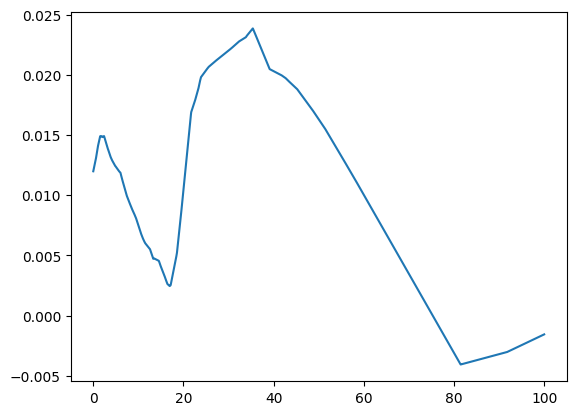

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_summer_plot=np.arange(0,100,100/3600) 
flow_time_summer=np.vstack((2*np.ones_like(flow_time_summer_plot, dtype=int),1*np.ones_like(flow_time_summer_plot, dtype=int),flow_time_summer_plot)).T
flow_result_summer = model.predict(flow_time_summer)   

plt.plot(flow_time_summer_plot, flow_result_summer)

JESIEŃ

Epoch 1/10
252/252 [==============================] - 1s 2ms/step - loss: 12532.9785 - mae: 15.3862
Epoch 2/10
252/252 [==============================] - 1s 2ms/step - loss: 0.9409 - mae: 0.3571
Epoch 3/10
252/252 [==============================] - 0s 2ms/step - loss: 0.7530 - mae: 0.2848
Epoch 4/10
252/252 [==============================] - 0s 2ms/step - loss: 32.2127 - mae: 1.9694
Epoch 5/10
252/252 [==============================] - 0s 2ms/step - loss: 0.6851 - mae: 0.1797
Epoch 6/10
252/252 [==============================] - 1s 2ms/step - loss: 0.6880 - mae: 0.1807
Epoch 7/10
252/252 [==============================] - 1s 2ms/step - loss: 0.6911 - mae: 0.1864
Epoch 8/10
252/252 [==============================] - 0s 2ms/step - loss: 0.6939 - mae: 0.1928
Epoch 9/10
252/252 [==============================] - 1s 2ms/step - loss: 0.6951 - mae: 0.2067
Epoch 10/10
113/113 [==============================] - 0s 739us/step


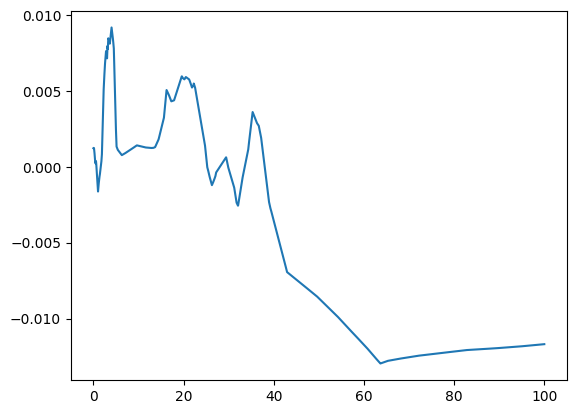

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_fall_plot=np.arange(0,100,100/3600) 
flow_time_fall=np.vstack((3*np.ones_like(flow_time_fall_plot, dtype=int),1*np.ones_like(flow_time_fall_plot, dtype=int),flow_time_fall_plot)).T
flow_result_fall = model.predict(flow_time_fall)   

plt.plot(flow_time_fall_plot, flow_result_fall)

ZIMA

Epoch 1/10
252/252 [==============================] - 1s 2ms/step - loss: 21023.4355 - mae: 20.5606
Epoch 2/10
252/252 [==============================] - 0s 2ms/step - loss: 0.9925 - mae: 0.3725
Epoch 3/10
252/252 [==============================] - 1s 2ms/step - loss: 2.6788 - mae: 0.9161
Epoch 4/10
252/252 [==============================] - 1s 2ms/step - loss: 1.1891 - mae: 0.5109
Epoch 5/10
252/252 [==============================] - 1s 2ms/step - loss: 1.8998 - mae: 0.7735
Epoch 6/10
252/252 [==============================] - 1s 2ms/step - loss: 3.2018 - mae: 1.1342
Epoch 7/10
252/252 [==============================] - 1s 2ms/step - loss: 4.4000 - mae: 1.3500
Epoch 8/10
252/252 [==============================] - 1s 2ms/step - loss: 5.4312 - mae: 1.3696
Epoch 9/10
252/252 [==============================] - 1s 2ms/step - loss: 71.8675 - mae: 2.1780
Epoch 10/10
113/113 [==============================] - 0s 784us/step


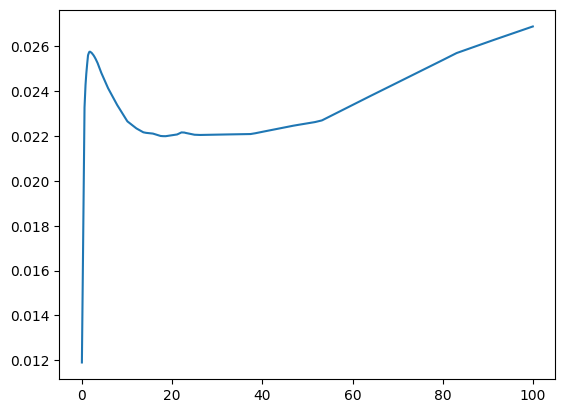

In [ ]:
dataset = DATASET

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_winter_plot=np.arange(0,100,100/3600) 
flow_time_winter=np.vstack((4*np.ones_like(flow_time_winter_plot, dtype=int),1*np.ones_like(flow_time_winter_plot, dtype=int),flow_time_winter_plot)).T
flow_result_winter = model.predict(flow_time_winter)   

plt.plot(flow_time_winter_plot, flow_result_winter)

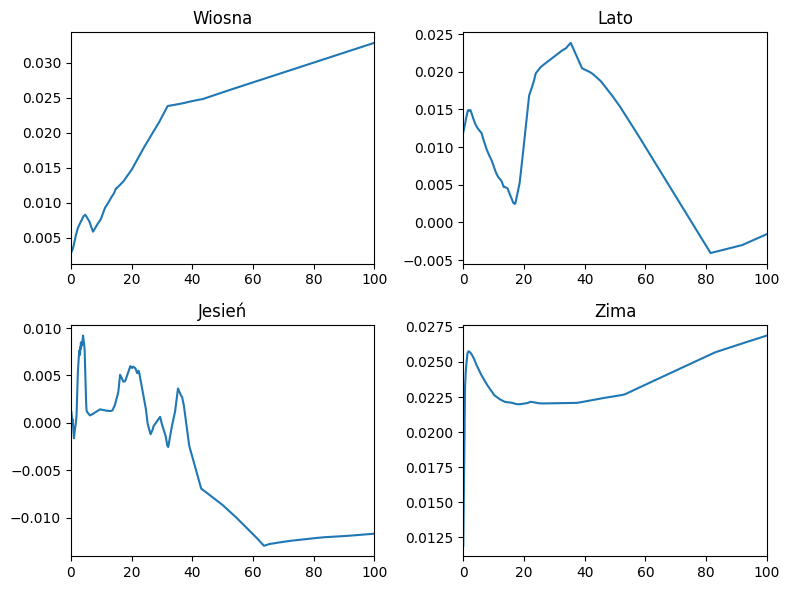

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0,0].plot(flow_time_spring_plot, flow_result_spring)
axs[0,0].set_title('Wiosna')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_summer_plot, flow_result_summer)
axs[0,1].set_title('Lato')
axs[0,1].set_xlim(0, 100)

axs[1,0].plot(flow_time_fall_plot, flow_result_fall)
axs[1,0].set_title('Jesień')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_winter_plot, flow_result_winter)
axs[1,1].set_title('Zima')
axs[1,1].set_xlim(0, 100)

plt.tight_layout()

plt.show()

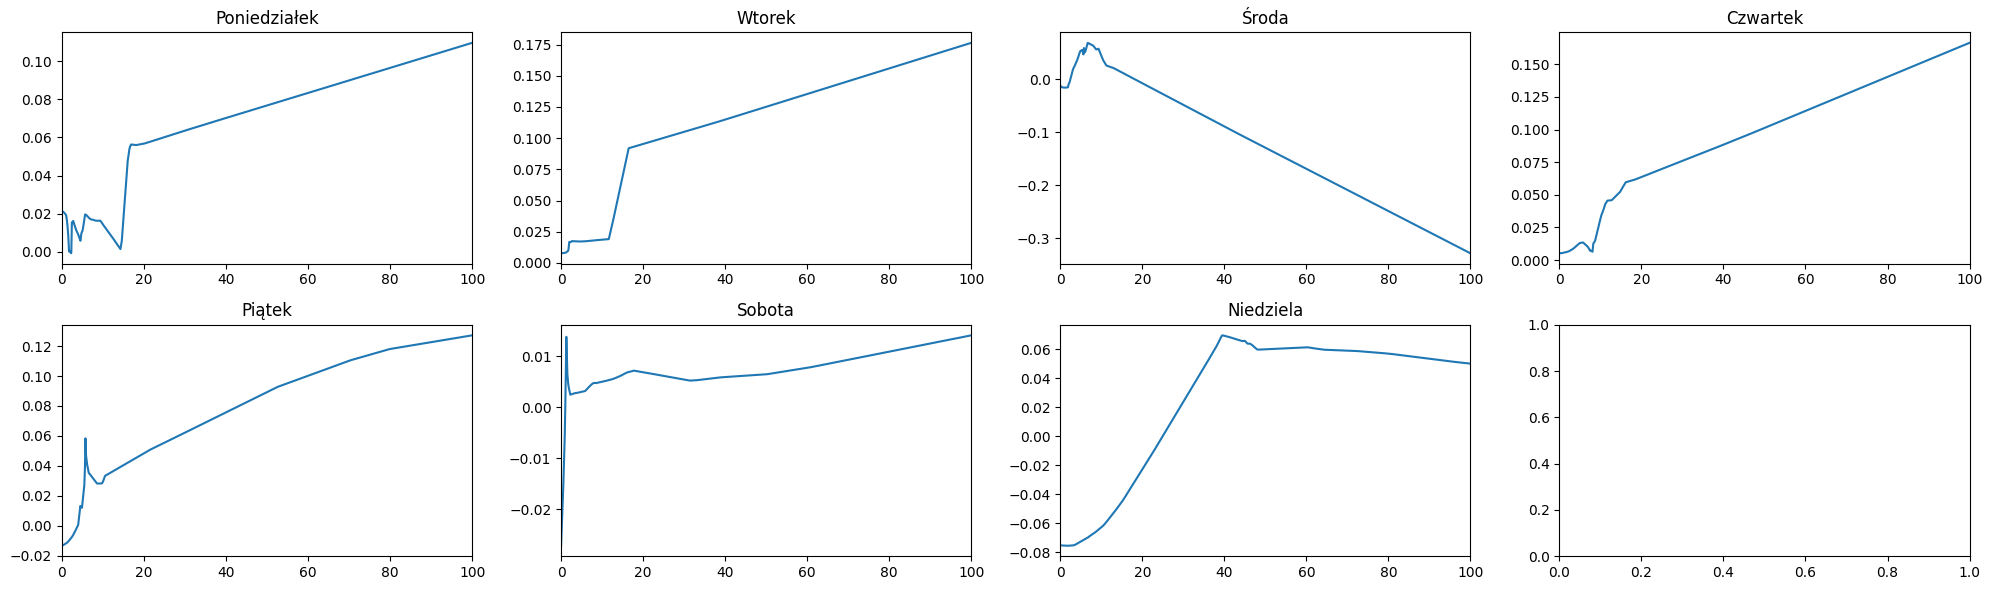

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(3600))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(3600))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(3600))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(3600))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(3600))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(3600))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_dn, flow_result_dn.reshape(3600))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()